## Import necessary modules
Run this cell before running any other cells

In [56]:
%reload_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-08-14 21:45:48,450 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:ec:f2:c2:23:04
2024-08-14 21:45:51,347 | INFO     |: Connected to c0:ec:f2:c2:23:04


In [57]:
# Notification Handler
time_list = []
roll_g = []
pitch_g = []
yaw_g = []
def notification_handler(uuid, byte_array):
    global time_list, roll_g, pitch_g, yaw_g
    rx_string = ble.bytearray_to_string(byte_array)
    if rx_string.find(',') < 0:
        print(rx_string[2:])
    else:
        time, roll, pitch, yaw = rx_string.split(',')
        time_list.append(time[2:])
        roll_g.append(float(roll[3:]))
        pitch_g.append(float(pitch[3:]))
        yaw_g.append(float(yaw[3:]))

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [58]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

24247


In [61]:
# Get the data
# 1761 samples in 5 sec, --> 2.8 ms each
ble.send_command(CMD.GET_IMU_DATA, "")

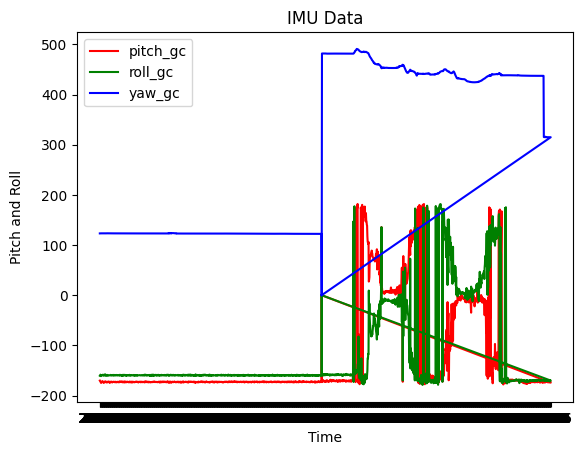

In [62]:
#plt.yticks([-180, -120, -60, 0, 60, 120, 180])
plt.plot(time_list, pitch_g, color='r', label='pitch_gc')
plt.plot(time_list, roll_g,  color='g', label='roll_gc')
plt.plot(time_list, yaw_g,   color='b', label='yaw_gc')
plt.title('IMU Data')
plt.xlabel('Time')
plt.ylabel('Pitch and Roll')
plt.legend()
plt.show()

## Disconnect

In [6]:
# Disconnect
ble.disconnect()

2024-08-02 13:25:58,083 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E
